In [2]:
from qiskit import QuantumCircuit, QuantumRegister

Uf 행렬을 적용하여 중첩상태를 얻었을 때 다시 |x,0>상태를 얻기 위해 Uf의 역행렬을 가하면 된다

하지만 Uf 를 모르고 Vf를 알 경우 Vf의 역행렬을 가해주면 되지만 다른 결과가 도출된다 -> garbage 생성

아래는 x,f(x),g(x)가 single bit라고 가정했을 때 cx게이트를 적용하는 상황

f(x) = x, g(x) = x 조건

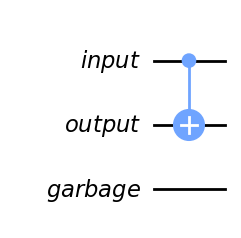

In [11]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

input의 copy를 만들고 cx게이트 두개를 건다

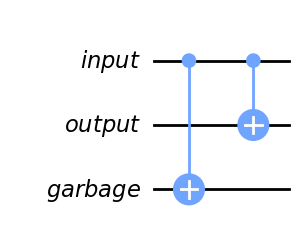

In [12]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

아래는 처음 Uf를 적용하고 Vf의 역행렬을 적용한 효과

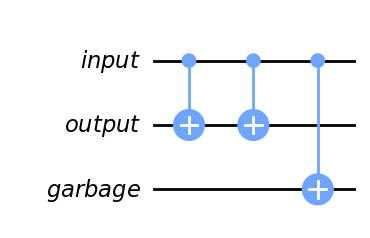

In [13]:
qc = Uf.compose(Vf.inverse())
qc.draw()

처음에 두개의 cx게이트가 적용되어 효과가 상쇄된다

input과 garbage사이의 cx게이트만 남는데 수학적으로 보면

Vf의 역행렬을 가하는 것은 초기 상태를 리턴해주진 않지만 첫 큐빗이 garbage와 얽히는 결과를 가져온다

classical garbage를 제거하기 위해 uncomputation이라는 방법을 사용하는데

또 다른 빈 변수를 추가하여 Vf를 적용하면 된다


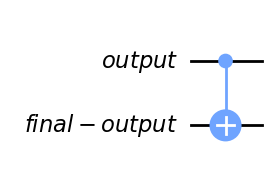

In [14]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()

이러한 복제 작업은
|x,f(x),g(x),0> 상태를 |x,f(x),g(x),f(x)>로 만들어 준다

여기에 Vf의 역행렬을 원래 계산게 적용하면
|x,f(x),g(x),0> 상태가 |x,0,0,f(x)>이 된다

복사된 f(x)는 남아있기 때문에 Uf를 얻을 수 있다



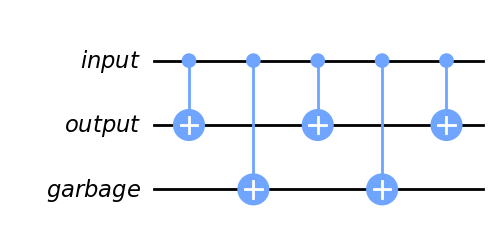

In [16]:
(Vf.inverse().compose(copy).compose(Vf)).draw()